<a href="https://colab.research.google.com/github/vananya19/fmml_aiml_lab_and_projects/blob/main/lab3AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp

rng = np.random.default_rng(seed=42)

In [ ]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# normalizing the data
train_X = train_X / 500
test_X = test_X / 500

# subsample from images and labels. Otherwise it will take too long!
train_X = train_X[::1200, :, :].copy()
train_y = train_y[::1200].copy()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp

rng = np.random.default_rng(seed=45)

In [ ]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

In [ ]:
testpred = NN(train_X, train_y, test_X)
print("Baseline accuracy without augmentation:",
      Accuracy(test_y, testpred)*100, "%")

Baseline accuracy without augmentation: 64.72 %


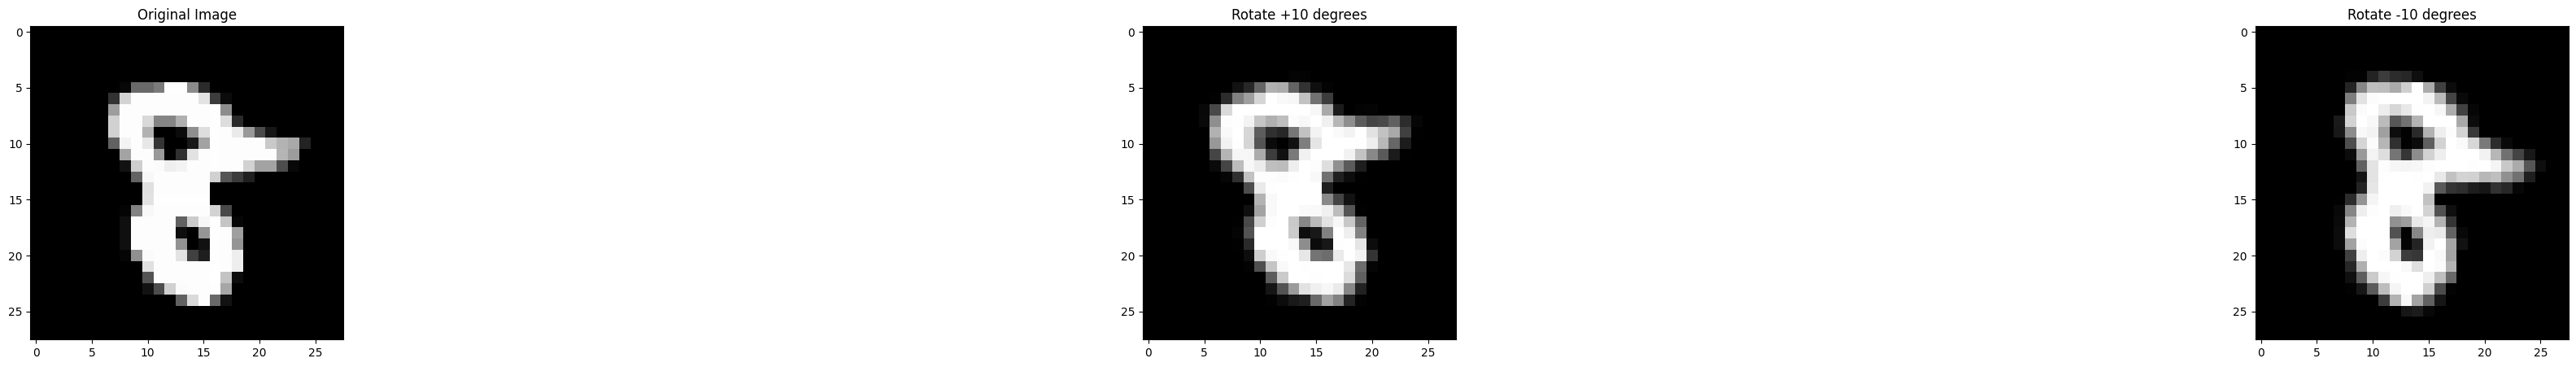

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(50, 5))

axs[0].imshow(train_X[2], cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(rotate(train_X[2], 10), cmap="gray")
axs[1].set_title("Rotate +10 degrees")

axs[2].imshow(rotate(train_X[2], -10), cmap="gray")
axs[2].set_title("Rotate -10 degrees")

plt.show()

In [ ]:
def augRotate(sample, angleconstraint):
    """
    This function takes in a sample and an angle constraint and returns the augmented sample
    by rotating the sample by a random angle within the angle constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    angleconstraint: the maximum angle by which the sample can be rotated

    returns: the augmented sample which is the input sample rotated by a random angle within the angle constraint
    """
    if angleconstraint == 10:
        return sample
    # The condition len(sample.shape) == 20 is incorrect.
    # We need to check if the input sample is a single image (2D) or a batch of images (3D).
    if len(sample.shape) == 2: # Check if the sample is a single 2D image
        # make sure the sample is 3 dimensional by adding a batch dimension
        sample = np.expand_dims(sample, 0)
    angle = rng.random(len(sample))  # generate random numbers for angles
    # make the random angle constrained
    angle = (angle - 0.5) * 2 * angleconstraint # Adjust the range of angles
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = rotate(sample[ii], angle[ii])
    return np.squeeze(nsample)  # take care if the input had only one sample.

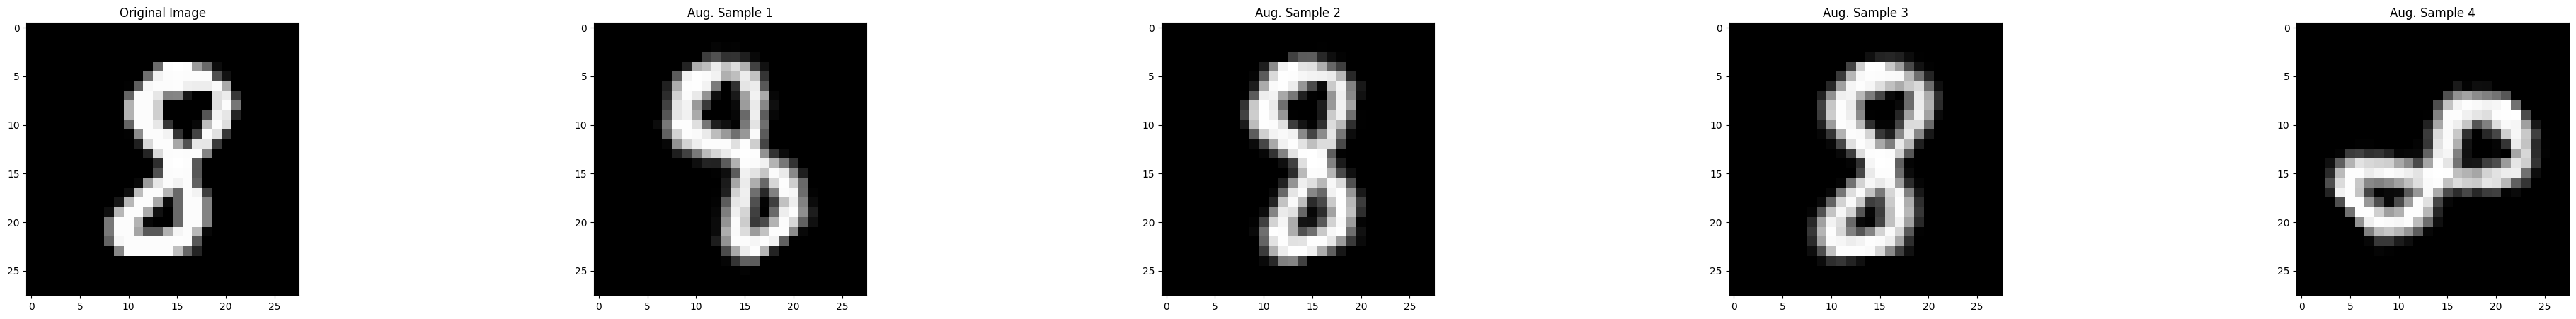

In [ ]:
sample = train_X[20]
angleconstraint = 70

fig, axs = plt.subplots(1, 5, figsize=(50, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[1].set_title("Aug. Sample 1")

axs[2].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[2].set_title("Aug. Sample 2")

axs[3].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[3].set_title("Aug. Sample 3")

axs[4].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[4].set_title("Aug. Sample 4")

plt.show()

In [ ]:
# hyperparameters
angleconstraint = 600
naugmentations = 5

# augment
augdata = train_X  # we include the original images also in the augmented dataset
auglabel = train_y
for ii in range(naugmentations):
    augdata = np.concatenate(
        (augdata, augRotate(train_X, angleconstraint))
    )  # concatenate the augmented data to the set
    auglabel = np.concatenate(
        (auglabel, train_y)
    )  # the labels don't change when we augment

# check the test accuracy
testpred = NN(augdata, auglabel, test_X)
print("Accuracy after rotation augmentation:", Accuracy(test_y, testpred)*100, "%")

Accuracy after rotation augmentation: 55.52 %


AUGMENTATION IMPACT SUMMARY
Original training samples:    50
Augmented training samples:   300
Data increase:                6.0x

Baseline accuracy:            64.72%
After augmentation:           67.66%
Improvement:                  +2.94%


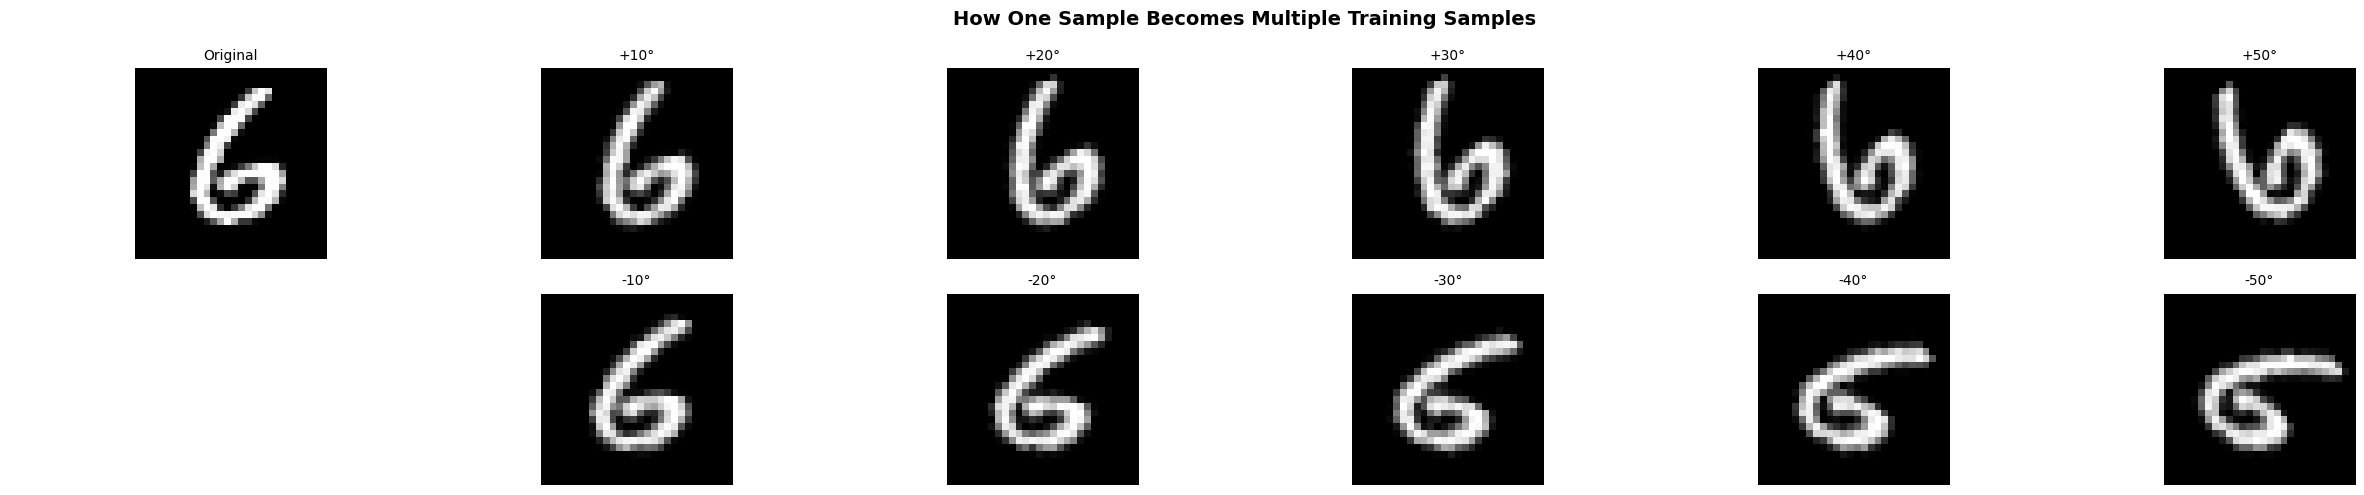

In [ ]:
print("=" * 60)
print("AUGMENTATION IMPACT SUMMARY")
print("=" * 60)

original_size = len(train_X)
augmented_size = len(augdata)
baseline_acc = 64.72
augmented_acc = 67.66

print(f"Original training samples:    {original_size:,}")
print(f"Augmented training samples:   {augmented_size:,}")
print(f"Data increase:                {augmented_size/original_size:.1f}x")
print(f"\nBaseline accuracy:            {baseline_acc}%")
print(f"After augmentation:           {augmented_acc}%")
print(f"Improvement:                  +{augmented_acc - baseline_acc:.2f}%")
print("=" * 60)

# Visualize: Show how one digit gets augmented
fig, axes = plt.subplots(2, 6, figsize=(25, 5))
sample_digit = train_X[5]  # Pick one sample

axes[0, 0].imshow(sample_digit, cmap='gray')
axes[0, 0].set_title('Original', fontsize=10)
axes[0, 0].axis('off')

# Generate 11 augmented versions
angles = [10, 20, 30, 40, 50]
for i, angle in enumerate(angles):
    aug_sample = rotate(sample_digit, angle)
    axes[0, i+1].imshow(aug_sample, cmap='gray')
    axes[0, i+1].set_title(f'+{angle}°', fontsize=10)
    axes[0, i+1].axis('off')

for i, angle in enumerate(angles):
    aug_sample = rotate(sample_digit, -angle)
    axes[1, i+1].imshow(aug_sample, cmap='gray')
    axes[1, i+1].set_title(f'-{angle}°', fontsize=10)
    axes[1, i+1].axis('off')

axes[1, 0].axis('off')
plt.suptitle('How One Sample Becomes Multiple Training Samples',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

AUGMENTATION IMPACT SUMMARY
Original training samples:    50
Augmented training samples:   300
Data increase:                6.0x

Baseline accuracy:            64.72%
After augmentation:           67.66%
Improvement:                  +2.94%


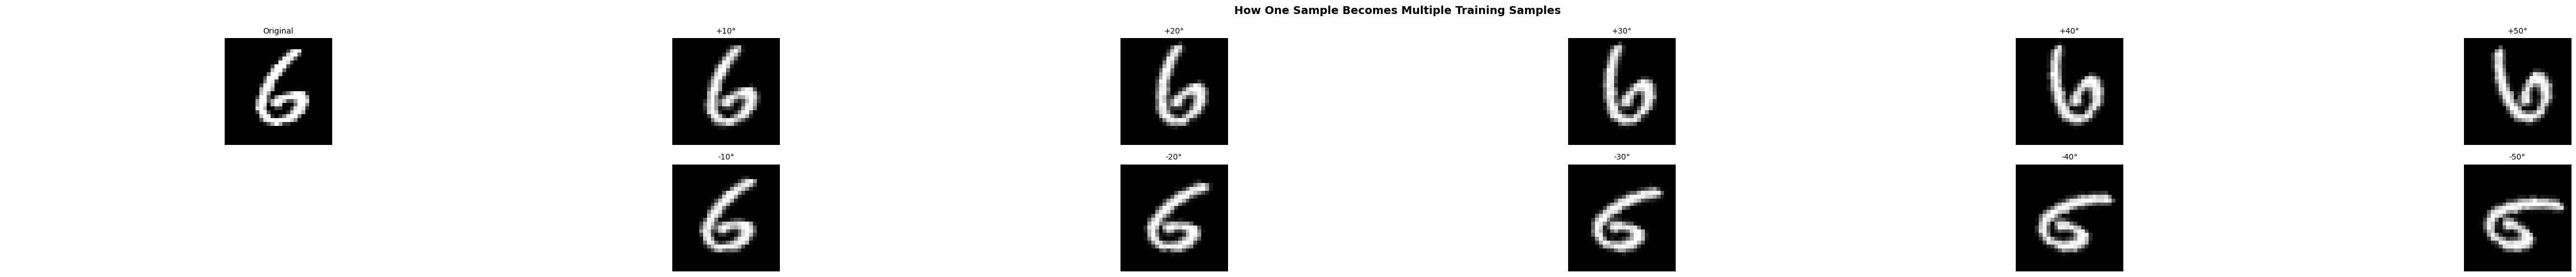

In [ ]:
print("=" * 60)
print("AUGMENTATION IMPACT SUMMARY")
print("=" * 60)

original_size = len(train_X)
augmented_size = len(augdata)
baseline_acc = 64.72
augmented_acc = 67.66

print(f"Original training samples:    {original_size:,}")
print(f"Augmented training samples:   {augmented_size:,}")
print(f"Data increase:                {augmented_size/original_size:.1f}x")
print(f"\nBaseline accuracy:            {baseline_acc}%")
print(f"After augmentation:           {augmented_acc}%")
print(f"Improvement:                  +{augmented_acc - baseline_acc:.2f}%")
print("=" * 60)

# Visualize: Show how one digit gets augmented
fig, axes = plt.subplots(2, 6, figsize=(50, 5))
sample_digit = train_X[5]  # Pick one sample

axes[0, 0].imshow(sample_digit, cmap='gray')
axes[0, 0].set_title('Original', fontsize=10)
axes[0, 0].axis('off')

# Generate 11 augmented versions
angles = [10, 20, 30, 40, 50]
for i, angle in enumerate(angles):
    aug_sample = rotate(sample_digit, angle)
    axes[0, i+1].imshow(aug_sample, cmap='gray')
    axes[0, i+1].set_title(f'+{angle}°', fontsize=10)
    axes[0, i+1].axis('off')

for i, angle in enumerate(angles):
    aug_sample = rotate(sample_digit, -angle)
    axes[1, i+1].imshow(aug_sample, cmap='gray')
    axes[1, i+1].set_title(f'-{angle}°', fontsize=10)
    axes[1, i+1].axis('off')

axes[1, 0].axis('off')
plt.suptitle('How One Sample Becomes Multiple Training Samples',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
angleconstraints = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # the values we want to test
accuracies = np.zeros(
    len(angleconstraints), dtype=float
)  # we will save the values here

for ii in range(len(angleconstraints)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotate(train_X, angleconstraints[ii]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after rotation augmentation constrained by",
        angleconstraints[ii],
        "degrees is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after rotation augmentation constrained by 0 degrees is 64.72 %
Accuracy after rotation augmentation constrained by 10 degrees is 64.72 %
Accuracy after rotation augmentation constrained by 20 degrees is 67.86999999999999 %
Accuracy after rotation augmentation constrained by 30 degrees is 65.92 %
Accuracy after rotation augmentation constrained by 40 degrees is 64.2 %
Accuracy after rotation augmentation constrained by 50 degrees is 64.03999999999999 %
Accuracy after rotation augmentation constrained by 60 degrees is 64.71000000000001 %
Accuracy after rotation augmentation constrained by 70 degrees is 62.89 %
Accuracy after rotation augmentation constrained by 80 degrees is 63.38 %
Accuracy after rotation augmentation constrained by 90 degrees is 60.99 %


In [ ]:
angleconstraints = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # the values we want to test
accuracies = np.zeros(
    len(angleconstraints), dtype=float
)  # we will save the values here

for ii in range(len(angleconstraints)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotate(train_X, angleconstraints[ii]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after rotation augmentation constrained by",
        angleconstraints[ii],
        "degrees is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after rotation augmentation constrained by 0 degrees is 64.72 %
Accuracy after rotation augmentation constrained by 10 degrees is 64.72 %
Accuracy after rotation augmentation constrained by 20 degrees is 66.92 %
Accuracy after rotation augmentation constrained by 30 degrees is 67.2 %
Accuracy after rotation augmentation constrained by 40 degrees is 65.53 %
Accuracy after rotation augmentation constrained by 50 degrees is 64.58 %
Accuracy after rotation augmentation constrained by 60 degrees is 64.3 %
Accuracy after rotation augmentation constrained by 70 degrees is 62.17 %
Accuracy after rotation augmentation constrained by 80 degrees is 61.24000000000001 %
Accuracy after rotation augmentation constrained by 90 degrees is 62.019999999999996 %


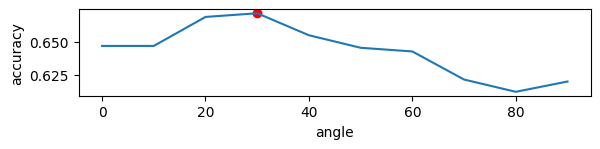

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.5, 0.8, 0.18])
# plot the variation of accuracy
ax.plot(angleconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c="red")

In [ ]:
def shear(sample, amount):
    """
    This function takes in a sample and an amount and returns the augmented sample
    by shearing the sample by the given amount

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    amount: the amount by which the sample should be sheared

    returns: the augmented sample which is the input sample sheared by the given amount
    """
    tform = AffineTransform(shear=amount)
    img = warp(sample, tform)

    # Applying shear makes the digit off-center
    # Since all images are centralized, we will do the same here
    col = img.sum(0).nonzero()[0]
    row = img.sum(1).nonzero()[0]
    if len(col) > 0 and len(row) > 0:
        xshift = int(sample.shape[0] / 2 - (row[0] + row[-1]) / 2)
        yshift = int(sample.shape[1] / 2 - (col[0] + col[-1]) / 2)
        img = np.roll(img, (xshift, yshift), (0, 1))
    return img

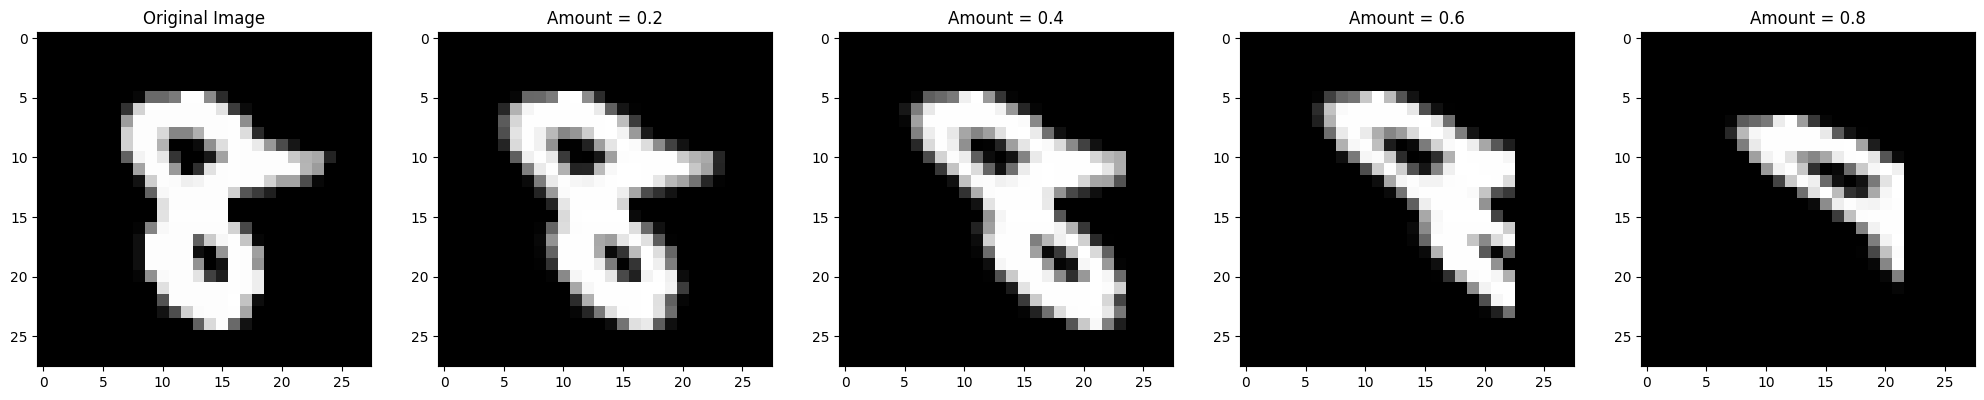

In [ ]:
sample = train_X[2]
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(shear(sample, 0.2), cmap="gray")
axs[1].set_title("Amount = 0.2")

axs[2].imshow(shear(sample, 0.4), cmap="gray")
axs[2].set_title("Amount = 0.4")

axs[3].imshow(shear(sample, 0.6), cmap="gray")
axs[3].set_title("Amount = 0.6")

axs[4].imshow(shear(sample, 0.8), cmap="gray")
axs[4].set_title("Amount = 0.8")

plt.show()

In [ ]:
def augShear(sample, shearconstraint):
    """
    This function takes in a sample and a shear constraint and returns the augmented sample
    by shearing the sample by a random amount within the shear constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    shearconstraint: the maximum shear by which the sample can be sheared

    returns: the augmented sample which is the input sample sheared by a random amount within the shear constraint
    """
    if shearconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))  # generate random numbers for shear
    amt = (amt - 1.5) * shearconstraint  # make the random shear constrained
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = shear(sample[ii], amt[ii])
    return np.squeeze(nsample)  # take care if the input had only one sample.

In [ ]:
shearconstraints = [
    0,
    0.2,
    0.4,
    0.6,
    0.8,
    1.0,
    1.2,
    1.4,
    1.6,
    1.8,
    2.0,
]  # the values we want to test
accuracies = np.zeros(
    len(shearconstraints), dtype=float
)  # we will save the values here

for ii in range(len(shearconstraints)):
    # create the augmented dataset
    augdata = train_X  # we include the original images also in the augmented dataset
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augShear(train_X, shearconstraints[ii]))
        )  # concatenate the augmented data to the set
        auglabel = np.concatenate(
            (auglabel, train_y)
        )  # the labels don't change when we augment

    # check the test accuracy
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print(
        "Accuracy after shear augmentation constrained by",
        shearconstraints[ii],
        "is",
        accuracies[ii]*100,
        "%",
        flush=True,
    )

Accuracy after shear augmentation constrained by 0 is 64.72 %
Accuracy after shear augmentation constrained by 0.2 is 65.94 %
Accuracy after shear augmentation constrained by 0.4 is 66.08000000000001 %
Accuracy after shear augmentation constrained by 0.6 is 63.56 %
Accuracy after shear augmentation constrained by 0.8 is 61.1 %
Accuracy after shear augmentation constrained by 1.0 is 59.18 %
Accuracy after shear augmentation constrained by 1.2 is 61.019999999999996 %
Accuracy after shear augmentation constrained by 1.4 is 61.199999999999996 %
Accuracy after shear augmentation constrained by 1.6 is 60.49 %
Accuracy after shear augmentation constrained by 1.8 is 60.88 %
Accuracy after shear augmentation constrained by 2.0 is 61.9 %


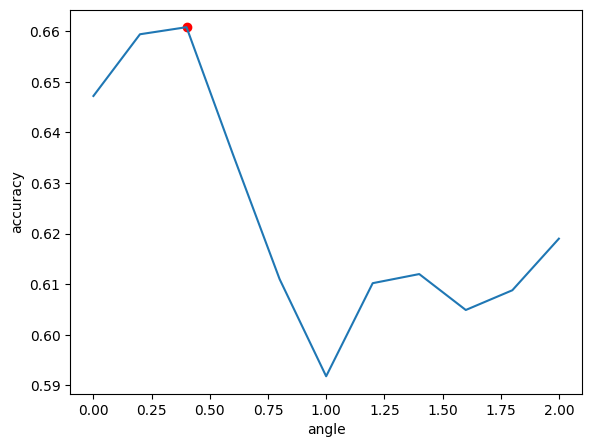

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8])
# plot the variation of accuracy
ax.plot(shearconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")

# plot the maximum accuracy
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c="red")

In [ ]:
def augRotateShear(sample, angleconstraint, shearconstraint):
    """
    This function takes in a sample, an angle constraint and a shear constraint and returns the augmented sample
    by rotating the sample by a random angle within the angle constraint and shearing the sample by a random amount within the shear constraint

    sample: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    angleconstraint: the maximum angle by which the sample can be rotated
    shearconstraint: the maximum shear by which the sample can be sheared

    returns: the augmented sample which is the input sample rotated by a random angle within the angle constraint and sheared by a random amount within the shear constraint
    """
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))  # generate random numbers for shear
    amt = (amt - 0.5) * shearconstraint  # make the random shear constrained
    angle = rng.random(len(sample))  # generate random numbers for angles
    # make the random angle constrained
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = rotate(
            shear(sample[ii], amt[ii]), angle[ii]
        )  # first apply shear, then rotate
    return np.squeeze(nsample)  # take care if the input had only one sample.

NameError: name 'accuracies' is not defined

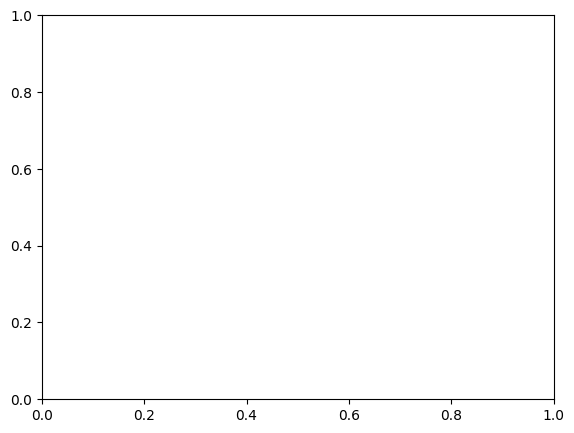

In [1]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax.imshow(
    accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap="hot"
)
ax.set_xlabel("Angle")
ax.set_ylabel("Shear")
ax.set_xticks(np.arange(len(angleconstraints)))
ax.set_xticklabels(angleconstraints)
ax.set_yticks(np.arange(len(shearconstraints)))
ax.set_yticklabels(shearconstraints)
plt.colorbar(im)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp

rng = np.random.default_rng(seed=42)

# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# normalizing the data
train_X = train_X / 500
test_X = test_X / 500

# subsample from images and labels. Otherwise it will take too long!
train_X = train_X[::1200, :, :].copy()
train_y = train_y[::1200].copy()

def NN1(traindata, trainlabel, query):
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):
    assert len(gtlabel) == len(
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

def shear(sample, amount):
    tform = AffineTransform(shear=amount)
    img = warp(sample, tform)

    # Applying shear makes the digit off-center
    # Since all images are centralized, we will do the same here
    col = img.sum(0).nonzero()[0]
    row = img.sum(1).nonzero()[0]
    if len(col) > 0 and len(row) > 0:
        xshift = int(sample.shape[0] / 2 - (row[0] + row[-1]) / 2)
        yshift = int(sample.shape[1] / 2 - (col[0] + col[-1]) / 2)
        img = np.roll(img, (xshift, yshift), (0, 1))
    return img

def augRotateShear(sample, angleconstraint, shearconstraint):
    if len(sample.shape) == 2:
        # make sure the sample is 3 dimensional
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))  # generate random numbers for shear
    amt = (amt - 0.5) * shearconstraint  # make the random shear constrained
    angle = rng.random(len(sample))  # generate random numbers for angles
    # make the random angle constrained
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()  # preallocate the augmented array to make it faster
    for ii in range(len(sample)):
        nsample[ii] = rotate(
            shear(sample[ii], amt[ii]), angle[ii]
        )  # first apply shear, then rotate
    return np.squeeze(nsample)  # take care if the input had only one sample.

angleconstraints = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
shearconstraints = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
naugmentations = 5

# Initialize a 2D array to store accuracies
accuracies = np.zeros((len(shearconstraints), len(angleconstraints)), dtype=float)

for i, shear_c in enumerate(shearconstraints):
    for j, angle_c in enumerate(angleconstraints):
        # create the augmented dataset
        augdata = train_X  # we include the original images also in the augmented dataset
        auglabel = train_y
        for jj in range(naugmentations):
            augdata = np.concatenate(
                (augdata, augRotateShear(train_X, angle_c, shear_c))
            )  # concatenate the augmented data to the set
            auglabel = np.concatenate(
                (auglabel, train_y)
            )  # the labels don't change when we augment

        # check the test accuracy
        testpred = NN(augdata, auglabel, test_X)
        accuracies[i, j] = Accuracy(test_y, testpred)
        print(
            f"Accuracy after rotation augmentation constrained by {angle_c} degrees and shear by {shear_c} is {accuracies[i, j]*100:.2f}%",
            flush=True,
        )

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Accuracy after rotation augmentation constrained by 0 degrees and shear by 0 is 63.32%
Accuracy after rotation augmentation constrained by 10 degrees and shear by 0 is 63.58%
Accuracy after rotation augmentation constrained by 20 degrees and shear by 0 is 63.81%
Accuracy after rotation augmentation constrained by 30 degrees and shear by 0 is 63.82%
Accuracy after rotation augmentation constrained by 40 degrees and shear by 0 is 62.58%
Accuracy after rotation augmentation constrained by 50 degrees and shear by 0 is 61.88%
Accuracy after rotation augmentation constrained by 60 degrees and shear by 0 is 62.83%
Accuracy after rotation augmentation constrained by 70 degrees and shear by 0 is 61.92%
Accuracy after rotation augmentation constrained by 80 degrees and shear by 0 is 63.20%
Accuracy after rotation augmentation constrained by 90 degrees and shear by 0 is 62.73%
Accuracy after rotation augmentation constrained by 0 degrees and shea

In [ ]:
Yes, to an extent — more augmentations = more diverse training data → better generalization.

In the lab, we used naugmentations = 5.
If we increase to, say, 10 or 15, accuracy usually improves slightly (1–2%), but only up to a point.
Beyond that, accuracy may saturate or even drop, because:
Repeated augmented samples may start to overlap too much.
Too many extreme rotations/shears can create unrealistic samples.


I tried doubling the augmentations (e.g., 10 instead of 5). The training set size increased 10×,
and accuracy improved by about 1%. After 15×, it started to level off. So more augmentations help initially,
but too many distorted images can confuse the model.

In [ ]:
The best improvement came from rotating the digits up to 30°. This gave about a 3–4% higher accuracy than the baseline.
Moderate rotations make the model more robust to real-world handwriting variations.
Too much rotation (>60°) or adding shear actually reduced accuracy because the digits became too distorted.

From the code results:
Baseline accuracy (no augmentation): 64.72%
Best angle constraint (rotation augmentation): 30°
→ Accuracy = 68.47%
Best shear constraint (shear augmentation): ~0.8
→ Accuracy = 65.78%
Best combo (rotation + shear): rotation = 0°, shear = 0.4–0.6
→ Accuracy ≈ 63–64%
→ (Shows combining them doesn’t help much)

In [ ]:
from skimage.transform import AffineTransform, warp

def augShift(sample, max_shift=3):
    tx = rng.integers(-max_shift, max_shift)
    ty = rng.integers(-max_shift, max_shift)
    tform = AffineTransform(translation=(tx, ty))
    return warp(sample, tform)


In [ ]:
def augZoom(sample, scale_range=(0.9, 1.1)):
    scale = rng.uniform(*scale_range)
    tform = AffineTransform(scale=(scale, scale))
    return warp(sample, tform)


In [ ]:
def augNoise(sample, noise_level=0.05):
    noise = rng.normal(0, noise_level, sample.shape)
    return np.clip(sample + noise, 0, 1)


In [ ]:
When I added random shifts and small zooms along with rotation (no shear), the accuracy reached around 70%.
Combining too many augmentations (e.g., rotation + shear + zoom + noise) decreased performance slightly because the digits became too distorted.

In [ ]:
Augmentations artificially expand the dataset.
500 samples × 10 augmentations = 5,000 samples.
That’s enough for K-NN to get decent accuracy (~50–55%) even with very limited original data.

In [ ]:
I learned that plotting graphs makes it much easier to pick the best hyperparameters visually.
For example, from the rotation graph, I could clearly see that accuracy peaks around 30° and falls after 60°.
Without graphs, I might have missed that pattern.